In [6]:

import pandas as pd
LOGFILENAME = "Apache_2k.log"

def read_as_df():
    df = pd.read_csv(LOGFILENAME,
              sep=r'\s',
              engine='python',
              usecols=[0, 1, 2,],
              names=['time', 'status', 'method'],
              na_values='-',
              header=None     
    )

    return(df)


print(read_as_df().tail())

                      time    status            method
[Mon Dec 5 19:14:11  2005]   [error]            mod_jk
           19:15:55  2005]  [notice]        jk2_init()
           19:15:55  2005]  [notice]        jk2_init()
           19:15:57  2005]  [notice]  workerEnv.init()
           19:15:57  2005]   [error]            mod_jk


In [57]:
def splitData(s):
    res = []
    i = s.index(']')
    res.append(s[1:i])
    s = s[i+1:]

    i = s.index(']')
    res.append(s[2:i])
    s = s[i+1:]

    res.append(s)
    return res

file = open("Apache_2k.log", "r")
lines = file.readlines()

clean_data = []
for line in lines:
    clean_data.append(splitData(line))
    
    
df = pd.DataFrame (clean_data,columns=['date_string', 'status', 'message'])


df['date'] = pd.to_datetime(df['date_string'])
df.set_index('date', inplace=True, drop=True)
df.head()

date_string  status  \
date                                                    
2005-12-04 04:47:44  Sun Dec 04 04:47:44 2005  notice   
2005-12-04 04:47:44  Sun Dec 04 04:47:44 2005   error   
2005-12-04 04:51:08  Sun Dec 04 04:51:08 2005  notice   
2005-12-04 04:51:09  Sun Dec 04 04:51:09 2005  notice   
2005-12-04 04:51:09  Sun Dec 04 04:51:09 2005  notice   

                                                               message  
date                                                                    
2005-12-04 04:47:44   workerEnv.init() ok /etc/httpd/conf/workers2....  
2005-12-04 04:47:44          mod_jk child workerEnv in error state 6\n  
2005-12-04 04:51:08   jk2_init() Found child 6725 in scoreboard slo...  
2005-12-04 04:51:09   jk2_init() Found child 6726 in scoreboard slo...  
2005-12-04 04:51:09   jk2_init() Found child 6728 in scoreboard slo...

In [58]:
# different status
df["status"].unique()

array(['notice', 'error'], dtype=object)

(array([1405.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         595.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

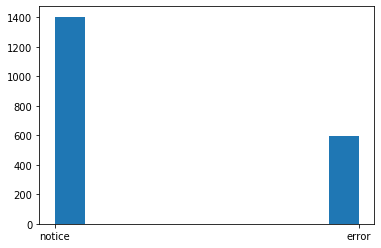

In [63]:
import matplotlib.pyplot as plt

plt.hist(df["status"] )

In [73]:
df.groupby('status').resample('D').count()

date_string  status  message
status date                                    
error  2005-12-04          311     311      311
       2005-12-05          284     284      284
notice 2005-12-04          740     740      740
       2005-12-05          665     665      665